In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import plotly.express as px
from sklearn.metrics import silhouette_score

In [3]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 6.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.9 MB 6.1 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.9 MB 6.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 6.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.7/9.9 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 6.9 MB/s  0:00:01


In [2]:
df = pd.read_csv('C:/Users/osegh/Desktop/UVA/ML 1 Intro to Predictive Modeling/ML-Healthdata-project/joining_data/CDC-2019-2021-2023-DATA.csv')

df.head()

C:\Users\osegh\AppData\Local\Temp\ipykernel_24860\3606275901.py:1: DtypeWarning: Columns (1,4,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/osegh/Desktop/UVA/ML 1 Intro to Predictive Modeling/ML-Healthdata-project/joining_data/CDC-2019-2021-2023-DATA.csv')


,Unnamed: 0,BIRTHSEX,MENTHLTH,POORHLTH,ADDEPEV3,DECIDE,DIFFALON,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,IYEAR
0,0,NaN,0.0,0.0,No,No,No,No,No,No,No,Yes,Never,More than once,Never,Never,Never,Never,2019
1,1,NaN,0.0,10.0,No,No,No,No,Yes,No,No,No,Never,Once,More than once,Never,Never,Never,2019
2,2,NaN,30.0,0.0,No,No,No,No,No,No,No,No,NaN,Never,Never,Never,Never,Never,2019
3,3,NaN,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,4,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2019


In [3]:
df.columns

Index(['Unnamed: 0', 'BIRTHSEX', 'MENTHLTH', 'POORHLTH', 'ADDEPEV3', 'DECIDE',
       'DIFFALON', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC',
       'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX',
       'IYEAR'],
      dtype='object')

In [3]:
#seperated by yes and no / Never, Once, More than once 
ace_YN = ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC']

ace_NOM = ['ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX',]


So for this variable 'ACEDIVRC' it is asking 'Were your parents separated or divorced?' The answer are yes, no, Don't know/Not sure, Parents not married, refused. I dropped Don't know/Not sure and refused but I don't want to drop parents not married.

In [5]:
for col in ace_YN:
    print(col, df[col].unique())

ACEDEPRS ['No' nan 'Yes']
ACEDRINK ['No' 'Yes' nan]
ACEDRUGS ['No' nan 'Yes']
ACEPRISN ['No' nan 'Yes']
ACEDIVRC ['Yes' 'No' nan 'Parents not married']


In [6]:
for col in ace_NOM:
    print(col, df[col].unique())

ACEPUNCH ['Never' nan 'More than once' 'Once']
ACEHURT1 ['More than once' 'Once' 'Never' nan]
ACESWEAR ['Never' 'More than once' nan 'Once']
ACETOUCH ['Never' nan 'Once' 'More than once']
ACETTHEM ['Never' nan 'Once' 'More than once']
ACEHVSEX ['Never' nan 'More than once' 'Once']


So I will have to use a Hierarchical Agglomerative Clustering because I have a mix data categories/ Tree

# Gower Distance (mixed variable types)

In [4]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, inconsistent, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [8]:
df.head()

,Unnamed: 0,BIRTHSEX,MENTHLTH,POORHLTH,ADDEPEV3,DECIDE,DIFFALON,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,IYEAR
0,0,NaN,0.0,0.0,No,No,No,No,No,No,No,Yes,Never,More than once,Never,Never,Never,Never,2019
1,1,NaN,0.0,10.0,No,No,No,No,Yes,No,No,No,Never,Once,More than once,Never,Never,Never,2019
2,2,NaN,30.0,0.0,No,No,No,No,No,No,No,No,NaN,Never,Never,Never,Never,Never,2019
3,3,NaN,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,4,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2019


In [5]:
df_clean = df.dropna(subset=ace_NOM + ace_YN)
df_clean

,Unnamed: 0,BIRTHSEX,MENTHLTH,POORHLTH,ADDEPEV3,DECIDE,DIFFALON,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,IYEAR
0,0,NaN,0.0,0.0,No,No,No,No,No,No,No,Yes,Never,More than once,Never,Never,Never,Never,2019
1,1,NaN,0.0,10.0,No,No,No,No,Yes,No,No,No,Never,Once,More than once,Never,Never,Never,2019
4,4,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2019
6,6,NaN,0.0,0.0,No,No,Yes,No,No,No,No,No,Never,Never,More than once,Never,Never,Never,2019
7,7,NaN,0.0,NaN,No,No,No,No,No,No,No,No,Never,Once,Never,Never,Never,Never,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233908,376947,NaN,6.0,28.0,1.0,Yes,Yes,Yes,No,No,No,No,Never,Never,Once,Once,Once,Never,2023
1233909,376948,NaN,7.0,NaN,0.0,No,Yes,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2023
1233910,376949,NaN,0.0,NaN,0.0,No,No,No,No,No,No,Yes,Never,Never,Never,Never,Never,Never,2023
1233911,376950,NaN,1.0,0.0,0.0,No,No,No,No,No,No,No,Never,Never,More than once,Never,Never,Never,2023


In [6]:
num_cols = []
cat_cols = ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC',
       'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX']

cat_cols

['ACEDEPRS',
 'ACEDRINK',
 'ACEDRUGS',
 'ACEPRISN',
 'ACEDIVRC',
 'ACEPUNCH',
 'ACEHURT1',
 'ACESWEAR',
 'ACETOUCH',
 'ACETTHEM',
 'ACEHVSEX']

In [7]:
def gower_distance(df_clean, cat_cols):
    X = df_clean[cat_cols].to_numpy() 
    
    n = X.shape[0]
    num_cols = len(cat_cols) 
    
    D = np.zeros((n, n), dtype=float)

    for i in range(n):
        for j in range(i + 1, n):
            matches = (X[i] == X[j])
            
            diff_count = np.sum(~matches) 
            
            d = diff_count / num_cols
            
            D[i, j] = D[j, i] = d
            
    return D

Due to memory constraints (full 201,597² pairwise distances ≈ 300 GB), we compute Gower distances on a random subsample of 2,000 observations

In [8]:
df_sample = df_clean.sample(n=3000, random_state=42)
distance_matrix = gower_distance(df_sample, cat_cols)
print(distance_matrix.shape)

(3000, 3000)


C:\Users\osegh\AppData\Local\Temp\ipykernel_24860\1973418877.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="average")


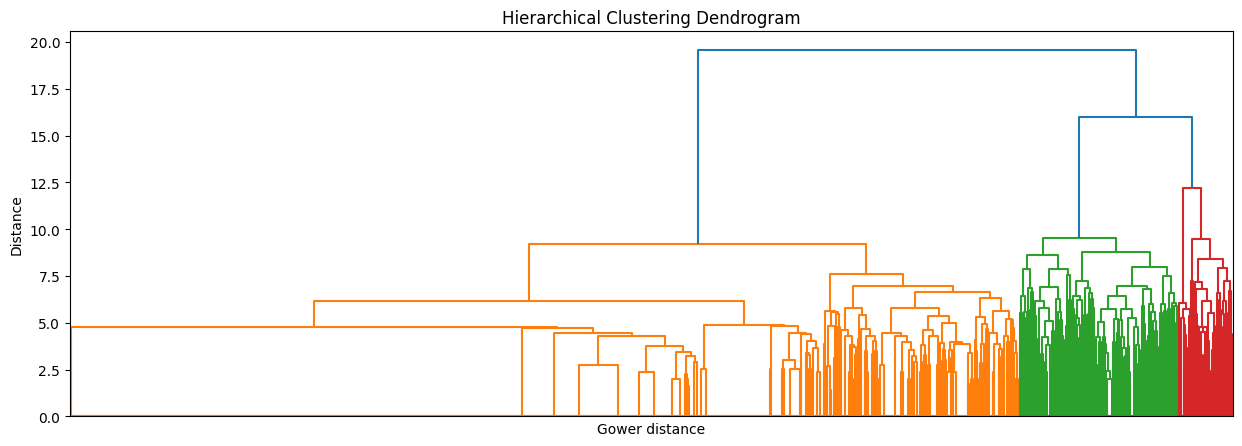

In [11]:
Z = linkage(distance_matrix, method="average")

plt.figure(figsize=(15, 5))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Gower distance")
plt.ylabel("Distance")
plt.show()

Based on this graph, k=2 is the strongest mathematical choice because the vertical jump from 25 to 35 is the biggest gap. However, k=3 might be more interesting for specific Health/ACE analysis if we want to find a "middle ground" group.

In [12]:
sil_results = []

for k in range(2, 5):
    model = AgglomerativeClustering(
        n_clusters=k,
        metric="precomputed",
        linkage="complete"
    )
    labels_k = model.fit_predict(distance_matrix)

    sil = silhouette_score(distance_matrix, labels_k, metric="precomputed")
    
    sil_results.append({"k": k, "silhouette": sil})

sil_df = pd.DataFrame(sil_results)
print("\nSilhouette scores:\n", sil_df)

best_k = sil_df.loc[sil_df["silhouette"].idxmax(), "k"]
print("Best K by silhouette (Gower):", int(best_k))


Silhouette scores:
    k  silhouette
0  2    0.528998
1  3    0.493288
2  4    0.494951
Best K by silhouette (Gower): 2


In [13]:
px.line(
    sil_df,
    x="k",
    y="silhouette",
    markers=True,
    title="Silhouette Scores for Different K (Gower Distance)"
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'k=%{x}<br>silhouette=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines+markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': 'AgME', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': 'CVpHiY3t4D9otPKiCJLfPyxnMCBIrd8/', 'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Silhouette Scores for Different K (Gower Distance)'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'k'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'silhouette'}}}
})